In [293]:
#load dataframe (pkl)
#summarize some examples, crop them using contours
#high score/ low score/ one high one low
#anything that stands out

#a window that is bigger than nuclei (square window 100 by 100), all crops have the same size
#just crop raw imgae, and draw with python for GT and Predicted (different color)

In [294]:
import pandas as pd
import os
import numpy as np
import cv2
import json
import glob
import matplotlib.pyplot as plt
import tqdm
from PIL import Image
from matplotlib.patches import Polygon

In [295]:
#path_idx = 1
src = r'\\fatherserverdw\Q\research\images\skin_aging\hovernet_tile\hovernet_manual_validation'
#manual = os.path.join(src,'manual_annotation')
#predicted = os.path.join(src,'predicted_nuclei_contour')
raw_ims = os.path.join(src,'raw_image')
raw_path = glob.glob(os.path.join(raw_ims,'*.tif'))

img_names = os.listdir(raw_ims)

In [296]:
#load dataframe
pth = r'C:\Users\kyuha\PycharmProjects\wsi_analysis\kyu\under_development'
df_paths = glob.glob(os.path.join(pth,'*.pkl'))
scores = pd.DataFrame(index =img_names,columns={'l_dice1','s_dice1','h_dice1','l_jaccard_score','h_jaccard_score','s_jaccard_score'})


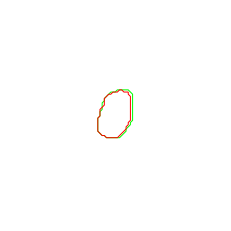

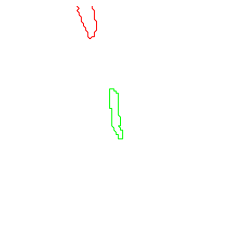

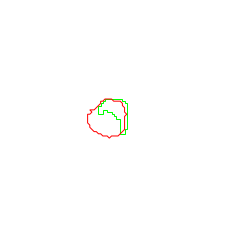

In [299]:
folder_dir = r'C:\Users\kyuha\Desktop\nuclei_crop_temp'
path_idx=2
df = pd.read_pickle(df_paths[path_idx])
raw_img = Image.open(raw_path[path_idx])

df2 = df.sort_values('jaccard_score',ascending=False,ignore_index=True)
strange = []
for idx,row in df2.iterrows():
    if abs(row['jaccard_score'] - row['dice1']) > 0.17:

        strange.append(row)
#pick one high and one low
col = df2.iloc[0]
h_man_ct = col['contour']
h_pred_ct = col['pred_contour']
h_ja_score = col['jaccard_score']
h_dice1 = col['dice1']
h_cent = col['centroid']

l_col = df2.iloc[len(df2.index)-1]
l_man_ct = l_col['contour']
l_pred_ct = l_col['pred_contour']
l_ja_score = l_col['jaccard_score']
l_dice1 = l_col['dice1']
l_cent = l_col['centroid']

if(len(strange)!= 0 ):
    s_col = strange[0]
    s_man_ct = s_col['contour']
    s_pred_ct = s_col['pred_contour']
    s_ja_score = s_col['jaccard_score']
    s_dice1 = s_col['dice1']
    s_cent = s_col['centroid']

#crop raw img 100x100 l,t,r,b
h_bbox = [h_cent[0]-50,h_cent[1]-50,h_cent[0]+ 50,h_cent[1]+50]
l_bbox = [l_cent[0]-50,l_cent[1]-50,l_cent[0]+ 50,l_cent[1]+50]
s_bbox = [s_cent[0]-50,s_cent[1]-50,s_cent[0]+ 50,s_cent[1]+50]


p = Polygon(np.array(h_man_ct).astype(np.int32), fill=False,color=[0, 1, 0])
p2 = Polygon(np.array(h_pred_ct).astype(np.int32), fill=False,color=[1, 0, 0])
fig,ax = plt.subplots()
ax.add_patch(p)
ax.add_patch(p2)
x0 = h_bbox[0]
y0 = h_bbox[1]
x1 = h_bbox[2]
y1 = h_bbox[3]
ax.set_xlim([x0,x1])
ax.set_ylim([y0,y1]) #but the image size is not 100x100
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
ct_filename = os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'contour_high.svg')
plt.savefig(ct_filename,bbox_inches='tight',pad_inches=0)

h_crop = raw_img.crop(h_bbox)

#low score
l_crop =raw_img.crop(l_bbox)

p = Polygon(np.array(l_man_ct).astype(np.int32), fill=False,color=[0, 1, 0])
p2 = Polygon(np.array(l_pred_ct).astype(np.int32), fill=False,color=[1, 0, 0])
fig,ax = plt.subplots()
ax.add_patch(p)
ax.add_patch(p2)
x0 = l_bbox[0]
y0 = l_bbox[1]
x1 = l_bbox[2]
y1 = l_bbox[3]
ax.set_xlim([x0,x1])
ax.set_ylim([y0,y1]) #but the image size is not 100x100
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
ct_filename = os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'contour_low.svg')
plt.savefig(ct_filename,bbox_inches='tight',pad_inches=0)

#strange

p = Polygon(np.array(s_man_ct).astype(np.int32), fill=False,color=[0, 1, 0])
p2 = Polygon(np.array(s_pred_ct).astype(np.int32), fill=False,color=[1, 0, 0])
fig,ax = plt.subplots()
ax.add_patch(p)
ax.add_patch(p2)
x0 = s_bbox[0]
y0 = s_bbox[1]
x1 = s_bbox[2]
y1 = s_bbox[3]
ax.set_xlim([x0,x1])
ax.set_ylim([y0,y1]) #but the image size is not 100x100
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
ct_filename = os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'contour_strange.svg')
plt.savefig(ct_filename,bbox_inches='tight',pad_inches=0)

s_crop = raw_img.crop(s_bbox)

h_crop.save(os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'_high.png'))
l_crop.save(os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'_low.png'))
s_crop.save(os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'_strange.png'))

#ToDo: this column is not outputed in order, something is wrong, need to fix!
scores.loc[img_names[path_idx]] = [l_dice1,s_dice1,h_dice1,l_ja_score,h_ja_score,s_ja_score]
scores.to_excel(os.path.join(folder_dir,'scores_idx2.xlsx'))

UnidentifiedImageError: cannot identify image file '\\\\fatherserverdw\\Q\\research\\images\\skin_aging\\hovernet_tile\\hovernet_manual_validation\\raw_image\\imID008_sec1_tile12.tif'

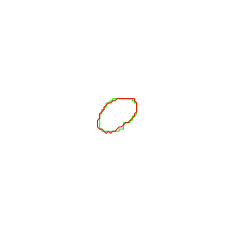

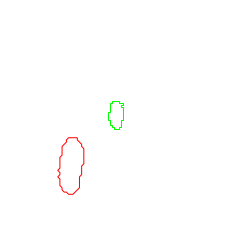

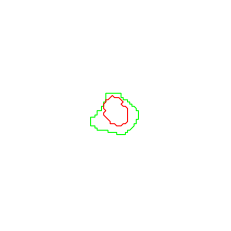

In [291]:
folder_dir = r'C:\Users\kyuha\Desktop\nuclei_crop_temp'
for path_idx in range (0,6):
    df = pd.read_pickle(df_paths[path_idx])
    raw_img = Image.open(raw_path[path_idx])

    df2 = df.sort_values('jaccard_score',ascending=False,ignore_index=True)
    strange = []
    for idx,row in df2.iterrows():
        if abs(row['jaccard_score'] - row['dice1']) > 0.17:

            strange.append(row)
    #pick one high and one low
    col = df2.iloc[0]
    h_man_ct = col['contour']
    h_pred_ct = col['pred_contour']
    h_ja_score = col['jaccard_score']
    h_dice1 = col['dice1']
    h_cent = col['centroid']

    l_col = df2.iloc[len(df2.index)-1]
    l_man_ct = l_col['contour']
    l_pred_ct = l_col['pred_contour']
    l_ja_score = l_col['jaccard_score']
    l_dice1 = l_col['dice1']
    l_cent = l_col['centroid']

    if(len(strange)!= 0 ):
        s_col = strange[0]
        s_man_ct = s_col['contour']
        s_pred_ct = s_col['pred_contour']
        s_ja_score = s_col['jaccard_score']
        s_dice1 = s_col['dice1']
        s_cent = s_col['centroid']

    #crop raw img 100x100 l,t,r,b
    h_bbox = [h_cent[0]-50,h_cent[1]-50,h_cent[0]+ 50,h_cent[1]+50]
    l_bbox = [l_cent[0]-50,l_cent[1]-50,l_cent[0]+ 50,l_cent[1]+50]
    s_bbox = [s_cent[0]-50,s_cent[1]-50,s_cent[0]+ 50,s_cent[1]+50]


    p = Polygon(np.array(h_man_ct).astype(np.int32), fill=False,color=[0, 1, 0])
    p2 = Polygon(np.array(h_pred_ct).astype(np.int32), fill=False,color=[1, 0, 0])
    fig,ax = plt.subplots()
    ax.add_patch(p)
    ax.add_patch(p2)
    x0 = h_bbox[0]
    y0 = h_bbox[1]
    x1 = h_bbox[2]
    y1 = h_bbox[3]
    ax.set_xlim([x0,x1])
    ax.set_ylim([y0,y1]) #but the image size is not 100x100
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    ct_filename = os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'contour_high.svg')
    plt.savefig(ct_filename,bbox_inches='tight',pad_inches=0)

    h_crop = raw_img.crop(h_bbox)

    #low score
    l_crop =raw_img.crop(l_bbox)

    p = Polygon(np.array(l_man_ct).astype(np.int32), fill=False,color=[0, 1, 0])
    p2 = Polygon(np.array(l_pred_ct).astype(np.int32), fill=False,color=[1, 0, 0])
    fig,ax = plt.subplots()
    ax.add_patch(p)
    ax.add_patch(p2)
    x0 = l_bbox[0]
    y0 = l_bbox[1]
    x1 = l_bbox[2]
    y1 = l_bbox[3]
    ax.set_xlim([x0,x1])
    ax.set_ylim([y0,y1]) #but the image size is not 100x100
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    ct_filename = os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'contour_low.svg')
    plt.savefig(ct_filename,bbox_inches='tight',pad_inches=0)

    #strange

    p = Polygon(np.array(s_man_ct).astype(np.int32), fill=False,color=[0, 1, 0])
    p2 = Polygon(np.array(s_pred_ct).astype(np.int32), fill=False,color=[1, 0, 0])
    fig,ax = plt.subplots()
    ax.add_patch(p)
    ax.add_patch(p2)
    x0 = s_bbox[0]
    y0 = s_bbox[1]
    x1 = s_bbox[2]
    y1 = s_bbox[3]
    ax.set_xlim([x0,x1])
    ax.set_ylim([y0,y1]) #but the image size is not 100x100
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    ct_filename = os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'contour_strange.svg')
    plt.savefig(ct_filename,bbox_inches='tight',pad_inches=0)

    s_crop = raw_img.crop(s_bbox)

    h_crop.save(os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'_high.png'))
    l_crop.save(os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'_low.png'))
    s_crop.save(os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'_strange.png'))

#ToDo: this column is not outputed in order, something is wrong, need to fix!
    scores.loc[img_names[path_idx]] = [l_dice1,s_dice1,h_dice1,l_ja_score,h_ja_score,s_ja_score]

In [313]:
scores.to_excel(os.path.join(folder_dir,'scores.xlsx'))